# CLUSTERING PRACTICAL

## ARTIN

## Mathieu Lagrange

reports are to be sent to [mathieu dot lagrange at ec-nantes dot fr] no later than a week after the lab  
DEADLINE : 25 Octobre 2021

"""
Created 12 / 10 / 2021

@author: Sid Ali DEBBACHE  & Pierre Baptiste DEMONCEAUX
"""

## Import tools

please import others if needed

In [19]:
import numpy as np
from numpy import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import make_blobs
from sklearn.cluster import kmeans_plusplus
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import confusion_matrix

## Data: generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters.

In [47]:
#Generate random clusters with the make_blobs function

features, clusters = make_blobs(n_samples = 100, n_features = 2, random_state=3,
                  centers = 4, cluster_std = 0.6, shuffle = True)
           
print (features.shape)
print(features)
print(clusters)

(100, 2)
[[ 7.5437803   6.920481  ]
 [-3.89163221  0.62228194]
 [-7.79497119 -5.92884848]
 [-7.54543635 -6.1714551 ]
 [-5.88262631 -5.89787385]
 [-3.55301671  1.0167948 ]
 [ 8.11451914  7.83645352]
 [ 0.04198678  4.55096172]
 [ 7.40693821  6.87939563]
 [ 7.31504227  7.9789109 ]
 [-4.75790293  0.44292924]
 [ 1.60537851  3.50231587]
 [-4.09486729  0.91728148]
 [ 7.5405898   7.48754579]
 [-7.74682782 -6.1793046 ]
 [-8.13064509 -5.63262045]
 [ 8.19416701  7.63884298]
 [-7.49947042 -5.56502516]
 [ 7.12639794  7.96163104]
 [-7.68124461 -5.76446421]
 [ 8.24597628  8.113698  ]
 [-3.77446226 -0.2967102 ]
 [ 1.69034483  4.08380791]
 [ 0.53369839  2.71150655]
 [ 7.58458261  8.44143218]
 [ 7.54895033  7.81241878]
 [-3.65733379 -0.55956988]
 [ 7.45201148  8.18172282]
 [-7.56495103 -5.70624162]
 [ 0.65796827  3.80979982]
 [ 7.81247451  8.09150288]
 [-5.93134787 -0.3665522 ]
 [-4.0901378  -0.42196506]
 [ 0.2276392   4.69372988]
 [-7.96584261 -5.81149512]
 [-4.22974978  0.55524341]
 [ 7.34155399  8.56

Display the set with one color per cluster using the scatter function from matplotlib.pyplot

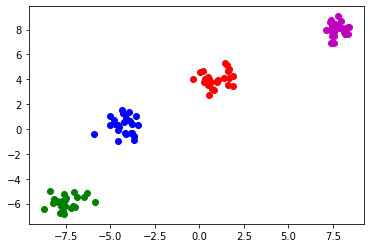

In [21]:
# Print all the clusters with different colors
colors = ['red', 'blue', 'm', 'green']
for k, col in enumerate (colors):
    cluster_data = clusters == k 
    plt.scatter(features[cluster_data,0], features[cluster_data,1], c=col)

plt.show()

## Baseline: the random clustering algorithm

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point.

In [22]:
def new_cluster(features):
    rng = np.random.default_rng()
    clusters = rng.integers(4, size=len(features))
    return clusters

rand_clusters = new_cluster (features)

# Comparision between the reference (clusters) and the random clusters (rand_clusters) created by the function
print (clusters)

print (rand_clusters)

[2 1 3 3 3 1 2 0 2 2 1 0 1 2 3 3 2 3 2 3 2 1 0 0 2 2 1 2 3 0 2 1 1 0 3 1 2
 3 1 0 0 2 3 3 0 0 3 3 0 1 3 2 1 2 3 3 2 3 1 3 0 0 1 1 1 0 1 0 2 1 2 1 1 2
 3 0 2 0 0 2 0 0 2 0 1 0 0 3 1 1 3 2 0 3 0 3 1 1 3 2]
[1 0 2 0 2 1 1 1 1 1 0 0 3 3 0 0 2 3 3 2 3 0 0 3 2 1 3 0 2 0 0 2 0 2 2 1 1
 0 1 0 3 0 1 0 2 1 1 2 3 2 1 3 3 2 2 2 1 2 1 1 1 2 3 2 2 2 2 2 1 0 2 2 0 1
 0 1 1 3 3 3 3 1 1 2 0 1 3 1 1 2 3 2 1 2 1 3 3 0 2 3]


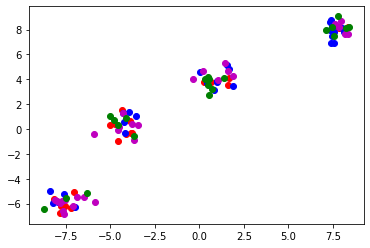

In [23]:
# We plot and attribute a new color to each point of the (features) dataset using the (random clusters)
colors = ['red', 'blue', 'm', 'green']
for k, col in enumerate (colors):
    cluster_data = rand_clusters == k 
    plt.scatter(features[cluster_data,0], features[cluster_data,1], c=col)

plt.show()

## Metric: the rand index

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [24]:
from scipy.special import comb 

def rand_index(clusters, clusters_pred):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(clusters_pred), 2).sum()
    A = np.c_[(clusters, clusters_pred)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)


Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

In [25]:
#We create a list with the values of the 100 rand index
rand_ind100 = [] 

for i in range (100) : 
    rand_clusters = new_cluster(features)
    rand_ind100.append (rand_index(clusters, rand_clusters))

Display results and compute the mean and standard deviation.

In [26]:
#Display the list 
print (rand_ind100)

# Compute the mean and the standard deviation
import statistics
print ("The mean value is : ",round(statistics.mean(rand_ind100), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_ind100),4))

[0.6375757575757576, 0.6321212121212121, 0.6303030303030303, 0.6311111111111111, 0.6296969696969696, 0.6319191919191919, 0.6272727272727273, 0.6270707070707071, 0.63010101010101, 0.6337373737373737, 0.6193939393939394, 0.6381818181818182, 0.6333333333333333, 0.6286868686868687, 0.6256565656565657, 0.6252525252525253, 0.6232323232323232, 0.6258585858585859, 0.6228282828282828, 0.6436363636363637, 0.6191919191919192, 0.6276767676767677, 0.6222222222222222, 0.6252525252525253, 0.6232323232323232, 0.6365656565656566, 0.6268686868686869, 0.6442424242424243, 0.6236363636363637, 0.6284848484848485, 0.6339393939393939, 0.6327272727272727, 0.636969696969697, 0.6183838383838384, 0.6260606060606061, 0.6248484848484849, 0.6337373737373737, 0.6272727272727273, 0.6163636363636363, 0.62, 0.6298989898989898, 0.6236363636363637, 0.6268686868686869, 0.6454545454545455, 0.6187878787878788, 0.6240404040404041, 0.6175757575757576, 0.6264646464646465, 0.6327272727272727, 0.6349494949494949, 0.63858585858585

## Hierarchical Clustering

Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance

In [27]:
import scipy.spatial.distance as spd

euclid_dist = spd.pdist (features , 'euclidean') 

Display and interpret its shape

In [28]:
print (euclid_dist.shape)
print(euclid_dist)

(4950,)
[13.05511282 20.00956184 19.9770681  ...  7.47561027 14.72184743
 21.17263678]


answer here



@@@@
"""
The pdist function compute the distance between all the points using Euclidean distance.
It can be see as N(N-1)/2 with N the number of points -->  (100*99/2) = 4950
"""

Compute the single link hierarchical clustering using the linkage function from scipy.cluster.hierarchy.

In [29]:
from scipy.cluster.hierarchy import linkage as lk


cluster_link = lk (euclid_dist, method='single', metric='euclidean')

Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

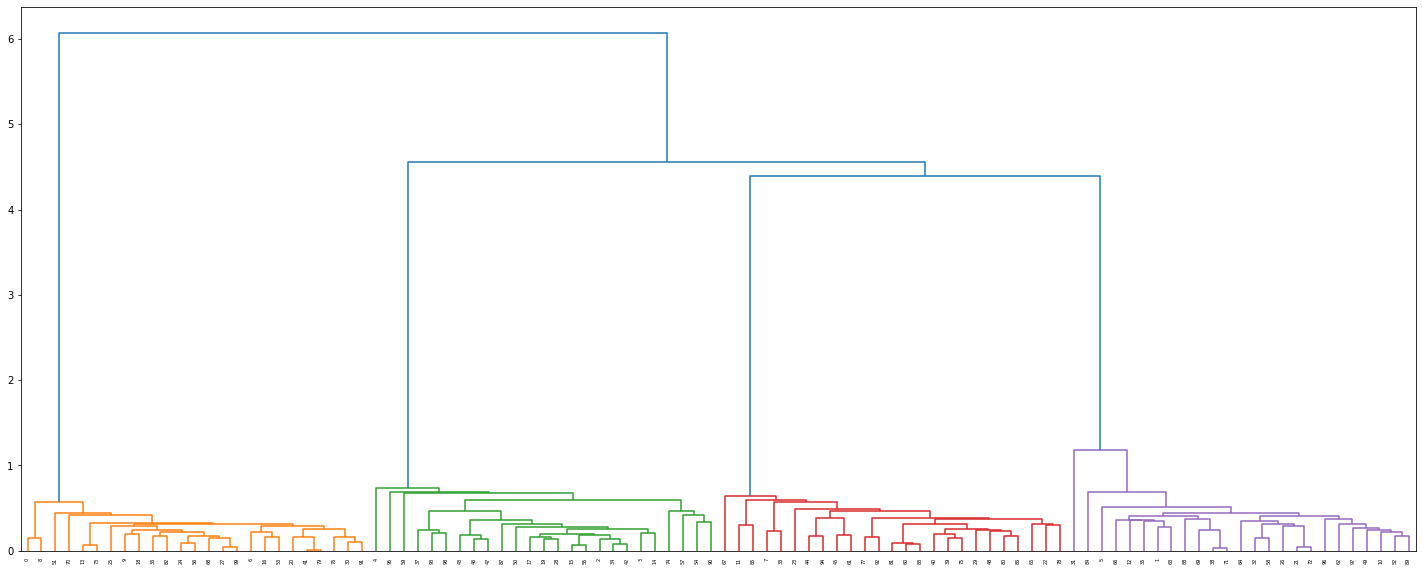

In [30]:
from scipy.cluster.hierarchy import dendrogram as dend # Import de dendrogram library

fig = plt.figure (figsize=(25,10)) #Modify the size of the plot
cluster_dn = dend(cluster_link)

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from scipy.cluster.hierarchy.

In [31]:
from scipy.cluster.hierarchy import fcluster as fcl 

# Clustering algorithm
def k_cluster (features):
    euclid_dist = spd.pdist (features , 'euclidean') 
    cluster_link = lk (euclid_dist, method='single', metric='euclidean')
    new_cluster = fcl(cluster_link, t=4 , criterion='maxclust')
    return new_cluster

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [48]:
rand_ind102 = [] 

for i in range (100) : 
    rand_clusters2 = k_cluster(features)
    rand_ind102.append (rand_index(clusters, rand_clusters2))


Display results and compute the mean and standard deviation.

In [33]:
print ("The mean value is : ",round(statistics.mean(rand_ind102), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_ind102),4))

The mean value is :  1.0
The standard deviation value is :  0.0


Explain why the standard deviation is 0.

The function fcluster return a list of cluster equal to the reference list. It explain why the mean value is equal to 1 and the standard deviation equal to 0

## Partitional Clustering

Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

In [34]:
from scipy.spatial.distance import cdist

# Initialization 
def init(data,k):
    
    KMplus = []
    KMplus.append((*data[0],))
    for a in range(1, k):
            D2 = np.array([min([np.inner(c-x,c-x) for c in KMplus]) for x in data])
            probs = D2/D2.sum()
            cumprobs = probs.cumsum()
            np.random.seed(20)           
            r = np.random.rand()        
            for j,p in enumerate(cumprobs):
                if r < p:
                    i = j
                    break
            KMplus.append((*data[i],))
    return cdist(data, KMplus, metric='euclidean', out=None),KMplus


In [35]:
def plotclusters(centers,data): 
    plt.figure (figsize=(20,10))
    for i in centers:
        plt.scatter(i[0],i[1],c='blue',s=60,marker='X')
        plt.text(i[0],i[1], r' k'+str(centers.index(i)),c='blue', fontsize = 18)
    for k in data:
        plt.scatter(k[0],k[1])


def new_center(new_KNcenters,sum_m):
    cont1=0
    for i2 in new_KNcenters:
        cont2=0
        for j in i2:
            if sum_m[cont1]!=0: 
                new_KNcenters[cont1][cont2]/=sum_m[cont1]
            cont2+=1
        cont1+=1
    return new_KNcenters

# Compare the previous cluster with the new one
def stability(new_clusters, prev_clusters):
    if ( new_clusters == prev_clusters ):
        return True
    else:
        return False

In [36]:
def k_mean(data,k):
   
    # Initialization

    dist, KNcenters = init(data,k) 

    
    while (True): # Calculate centers in order to define the clusters
        clust=[]
        new_centers=[]
        for x in range(k):
            coord=[]
            for j in range(data[0].size):
                coord.append(0)
            new_centers.append(coord)
        sum_m=np.zeros((k))
        
        cont=0
        
        
        for euclid_dist in dist:
            c=0
            for val in euclid_dist:
                
                if (val == min(euclid_dist)):
                    break
                c+=1
             
            if c >3:
                break
            new_centers[c][0]+=data[cont][0]
            new_centers[c][1]+=data[cont][1]
            clust.append(c)  
            sum_m[c]+=1
            cont+=1
        
        # Compute the new centers
        new_centers = new_center(new_centers,sum_m)
        # Call the function stability
        stab = stability (new_centers,KNcenters)
        if (stab == True) :
            break # If the previous cluster is equal to the new one, we break the while loop
        else:
            dist = cdist(data, new_centers, metric='euclidean', out=None)
            KNcenters=new_centers
     #Plot the clusters with final centers
    return clust 
    

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [37]:
#We create a list with the values of the 100 rand index

rand_ind103=[]

for i in range (100) : 
    rand_clusters3 = k_mean(features,4)
    rand_ind103.append (rand_index(clusters, rand_clusters3))
print (rand_clusters3)


[0, 2, 1, 1, 1, 2, 0, 3, 0, 0, 2, 3, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 3, 3, 0, 0, 2, 0, 1, 3, 0, 2, 2, 3, 1, 2, 0, 1, 2, 3, 3, 0, 1, 1, 3, 3, 1, 1, 3, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 3, 3, 2, 2, 2, 3, 2, 3, 0, 2, 0, 2, 2, 0, 1, 3, 0, 3, 3, 0, 3, 3, 0, 3, 2, 3, 3, 1, 2, 2, 1, 0, 3, 1, 3, 1, 2, 2, 1, 0]


Display results and compute the mean and standard deviation.

In [38]:
# Mean and standard deviation calculation
print ("The mean value is : ",round(statistics.mean(rand_ind103), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_ind103),4))

The mean value is :  1.0
The standard deviation value is :  0.0


## Performance Analysis

Display the performance of the 3 clustering algorithms on the synthetic dataset using the bar function from matplotlib.pyplot.

<BarContainer object of 3 artists>

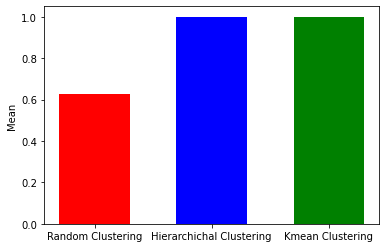

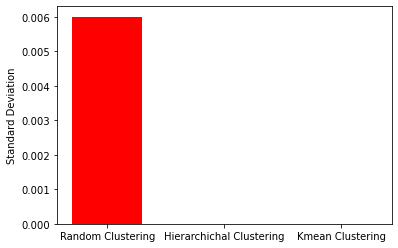

In [46]:

#Graph for the Mean calculation 
fig = plt.figure()
plt.ylabel('Mean')
plt.bar([1,2,3],[round(statistics.mean(rand_ind100), 3),round(statistics.mean(rand_ind102), 3),round(statistics.mean(rand_ind103), 3)],0.6,tick_label=['Random Clustering','Hierarchichal Clustering','Kmean Clustering'],color=['r','b','g'])


#Graph for the Standard deviation calculation
fig = plt.figure()
plt.ylabel('Standard Deviation')
plt.bar([1,2,3],[round(statistics.stdev(rand_ind100),4),round(statistics.stdev(rand_ind102),4),round(statistics.stdev(rand_ind103),4)],0.6,tick_label=['Random Clustering','Hierarchichal Clustering','Kmean Clustering'],color=['r','b','g']) 

Load the iris dataset using the load_iris function from scikit-learn and perform the same performance analysis using this dataset.

Baseline algorithm
The mean value is :  0.585
The standard deviation value is :  0.0034
Hierarchical clustering
The mean value is :  0.777
The standard deviation value is :  0.0
Kmeans clustering
The mean value is :  0.817
The standard deviation value is :  0.0


<BarContainer object of 3 artists>

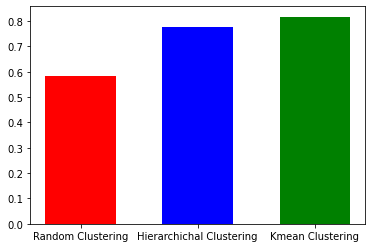

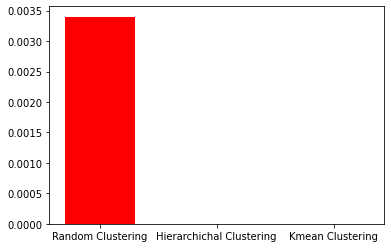

In [45]:
from sklearn.datasets import load_iris

Iris, Iris_target = load_iris(return_X_y=True) #We split the dataset between the features (Iris), and the target cluster list (Iris_target)


#compute with random algorithm
rand_indIris=[]
for i in range (100) : 
    bs_Iris = new_cluster(Iris)
    rand_indIris.append (rand_index(Iris_target, bs_Iris))

     # Mean and standard deviation calculation
print ("Baseline algorithm")
print ("The mean value is : ",round(statistics.mean(rand_indIris), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_indIris),4))

#Compute with hierarchical clustering
rand_indIris2=[]
for i in range (100) : 
    k_Iris = k_cluster (Iris)
    rand_indIris2.append (rand_index(Iris_target, k_Iris))
     # Mean and standard deviation calculation
print ("Hierarchical clustering")
print ("The mean value is : ",round(statistics.mean(rand_indIris2), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_indIris2),4))

#Compute with Kmeans algorithm
rand_indIris3=[]
for i in range (100) : 
    KM_Iris = k_mean(Iris,3)
    rand_indIris3.append (rand_index(Iris_target, KM_Iris))
     # Mean and standard deviation calculation
print ("Kmeans clustering")
print ("The mean value is : ",round(statistics.mean(rand_indIris3), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_indIris3),4))

#Graph for the Mean calculation 
fig = plt.figure()
plt.bar([1,2,3],[round(statistics.mean(rand_indIris), 3),round(statistics.mean(rand_indIris2), 3),round(statistics.mean(rand_indIris3), 3)],0.6,tick_label=['Random Clustering','Hierarchichal Clustering','Kmean Clustering'],color=['r','b','g'])
plt.ylabel('Mean')

#Graph for the Standard deviation calculation
fig = plt.figure()
plt.bar([1,2,3],[round(statistics.stdev(rand_indIris),4),round(statistics.stdev(rand_indIris2),4),round(statistics.stdev(rand_indIris3),4)],0.6,tick_label=['Random Clustering','Hierarchichal Clustering','Kmean Clustering'],color=['r','b','g']) 
plt.ylabel('Standard Deviation')


Load the Breast cancer wisconsin (diagnostic) dataset dataset using the load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

Baseline algorithm
The mean value is :  0.484
The standard deviation value is :  0.001
Hierarchical clustering
The mean value is :  0.535
The standard deviation value is :  0.0
Kmeans clustering
The mean value is :  0.7
The standard deviation value is :  0.0


<BarContainer object of 3 artists>

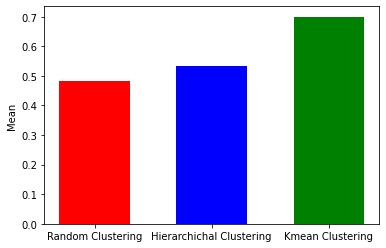

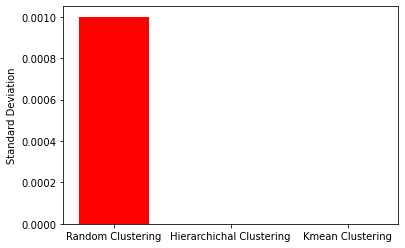

In [44]:
from sklearn.datasets import load_breast_cancer

Cancer, Cancer_target = load_breast_cancer(return_X_y=True) #We split the dataset between the features (Cancer), and the target cluster list (Cancer_target)


#compute with random algorithm
rand_indCancer=[]
for i in range (100) : 
    bs_Cancer = new_cluster(Cancer)
    rand_indCancer.append (rand_index(Cancer_target, bs_Cancer))

     # Mean and standard deviation calculation
print ("Baseline algorithm")
print ("The mean value is : ",round(statistics.mean(rand_indCancer), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_indCancer),4))

#Compute with hierarchical clustering
rand_indCancer2=[]
for i in range (100) : 
    k_Cancer = k_cluster (Cancer)
    rand_indCancer2.append (rand_index(Cancer_target, k_Cancer))
     # Mean and standard deviation calculation
print ("Hierarchical clustering")
print ("The mean value is : ",round(statistics.mean(rand_indCancer2), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_indCancer2),4))

#Compute with Kmeans algorithm
rand_indCancer3=[]
for i in range (100) : 
    KM_Cancer = k_mean(Cancer,3)
    rand_indCancer3.append (rand_index(Cancer_target, KM_Cancer))
     # Mean and standard deviation calculation
print ("Kmeans clustering")
print ("The mean value is : ",round(statistics.mean(rand_indCancer3), 3))
print ("The standard deviation value is : ",round(statistics.stdev(rand_indCancer3),4))

#Graph for the Mean calculation 
fig = plt.figure()
plt.ylabel('Mean')
plt.bar([1,2,3],[round(statistics.mean(rand_indCancer), 3),round(statistics.mean(rand_indCancer2), 3),round(statistics.mean(rand_indCancer3), 3)],0.6,tick_label=['Random Clustering','Hierarchichal Clustering','Kmean Clustering'],color=['r','b','g'])


#Graph for the Standard deviation calculation
fig = plt.figure()
plt.ylabel('Standard Deviation')
plt.bar([1,2,3],[round(statistics.stdev(rand_indCancer),4),round(statistics.stdev(rand_indCancer2),4),round(statistics.stdev(rand_indCancer3),4)],0.6,tick_label=['Random Clustering','Hierarchichal Clustering','Kmean Clustering'],color=['r','b','g']) 



We can see that in all three cases, the standard deviation values are equal to zero for the Hierarchical and Kmeans clustering method. We also note that the Kmeans algorithm have always closer to one than the others algorithm

## [Bonus] Determining the number of clusters

Implement the gap statistic method for determining the optimal number of clusters for the 3 datasets.


Discuss the results.

answer here.